# This notebook is designed to try and create heat maps for h-abstraction reactions on biofules

In [1]:
from rmgpy.molecule import Molecule, Bond, Atom
from rmgpy.reaction import Reaction
from rmgpy.kinetics import Arrhenius, MultiArrhenius

import rdkit
import inspect
from rmgpy.qm.molecule import QMMolecule, Geometry
from rmgpy.qm.main import QMSettings
import os
import re
from collections import defaultdict, OrderedDict
import pandas as pd
import itertools

%matplotlib inline

import matplotlib
import numpy as np
import sympy
import matplotlib.pyplot as plt
from matplotlib.collections import EllipseCollection 


## This next portion of the code is deisgned to loop through all of the log files for bioTST and create a dataframe with the parent molecule, the abstractor, the radical of the parent molecule, the arrhenius expression and the reaction.

In [4]:
# Getting Kinetics and Reactions from log file
scratch_directory = "/gss_gpfs_scratch/harms.n/bioTST/biofuels_rerun"
results = defaultdict(OrderedDict)

j = 0
for file in os.listdir(scratch_directory):
    if file.endswith(".log") and file.startswith("AutoTST"):
        m  =  re.match("AutoTST-biofuels.(.*).combined.log", file)
        if not m:
            print file
        i = int(m.group(1))
        r = results[i]
        r["Log Number"] = i
        
        
        file_name = os.path.join(scratch_directory, file)
        with open(file_name, "r") as f:
            lines = f.readlines()
            for line in lines:
                m = re.match('biofuelsTST.py:191 performCalcs INFO chemkinRxn: (.*)', line)
                if m:
                    rxn = eval(m.group(1))
                    print rxn
                    r['Reaction'] = rxn 
                    
                    # The following portion of the code creates the pair of molecules which have the greatest weight
                    # This _should_ be the biofule of interest and its corresponding radical.
                    
                    weight0, weight1 = pd.DataFrame(rxn.pairs).applymap(Molecule.getMolecularWeight).sum(axis=1)
                    if weight0 > weight1:
                        heavy_pair = rxn.pairs[0]
                        light_pair = rxn.pairs[1]
                    else:
                        heavy_pair = rxn.pairs[1]
                        light_pair = rxn.pairs[0]
                    
                    print heavy_pair
                    print light_pair
                    
                    light0, light1 = light_pair
                    
                    if light_pair[0].isRadical():
                        abstractor = light_pair[0]
                    else:
                        abstractor = light_pair[1]
                    r["Abstractor"] = abstractor.toSMILES()
                    
                    print abstractor
                    
                    heavy0, heavy1 = heavy_pair
                
                    if heavy0.isRadical():
                        r["Radical Molecule"] = heavy0.toSMILES()
                        r["Parent Molecule"] = heavy1.toSMILES()
                    else:
                        r["Radical Molecule"] = heavy1.toSMILES()
                        r["Parent Molecule"] = heavy0.toSMILES() 
     
                n = re.match('We have calculated kinetics (.*)', line)
                if n:
                    kinetics = eval(n.group(1))
                    r["Arrhenius Expression"] = kinetics 
                    print kinetics
                    j += 1

        del m
        print
        print
df = pd.DataFrame(results).T
df = df.set_index(df["Parent Molecule"])
print j
df

<Molecule "[OH]"> + <Molecule "C=CCCCC(C)C"> <=> <Molecule "O"> + <Molecule "[CH]=CCCCC(C)C">
[Molecule(SMILES="C=CCCCC(C)C"), Molecule(SMILES="[CH]=CCCCC(C)C")]
[Molecule(SMILES="[OH]"), Molecule(SMILES="O")]
<Molecule "[OH]">


<Molecule "CCCC(C)C=C(C)C"> + <Molecule "[O]"> <=> <Molecule "[OH]"> + <Molecule "[CH2]C(C)=CC(C)CCC">
[Molecule(SMILES="CCCC(C)C=C(C)C"), Molecule(SMILES="[CH2]C(C)=CC(C)CCC")]
[Molecule(SMILES="[O]"), Molecule(SMILES="[OH]")]
<Molecule "[O]">


<Molecule "[CH3]"> + <Molecule "CC1=CCC2CC1C2(C)C"> <=> <Molecule "C"> + <Molecule "[CH2]C1(C)C2CC=C(C)C1C2">
[Molecule(SMILES="CC1=CCC2CC1C2(C)C"), Molecule(SMILES="[CH2]C1(C)C2CC=C(C)C1C2")]
[Molecule(SMILES="[CH3]"), Molecule(SMILES="C")]
<Molecule "[CH3]">


<Molecule "[OH]"> + <Molecule "CC(=O)OCCC(C)C"> <=> <Molecule "O"> + <Molecule "[CH2]C(=O)OCCC(C)C">
[Molecule(SMILES="CC(=O)OCCC(C)C"), Molecule(SMILES="[CH2]C(=O)OCCC(C)C")]
[Molecule(SMILES="[OH]"), Molecule(SMILES="O")]
<Molecule "[OH]">


<Molecule "C"> +

Abstractor Arrhenius Expression Log Number Parent Molecule  \
Parent Molecule                                                              
OO                     [O]                  NaN          1              OO   
OO                    [O]O                  NaN          2              OO   
[O]O                  [OH]                  NaN          3            [O]O   
[O]O                   [H]                  NaN          4            [O]O   
[O][O]                 [O]                  NaN          5          [O][O]   
[O]O                 [CH3]                  NaN          6            [O]O   
OO                   [CH2]                  NaN          7              OO   
CC(C)CC(C)(C)C        [O]O                  NaN          8  CC(C)CC(C)(C)C   
CC(C)CC(C)(C)C        [O]O                  NaN          9  CC(C)CC(C)(C)C   
CC(C)CC(C)(C)C        [O]O                  NaN         10  CC(C)CC(C)(C)C   
CC(C)CC(C)(C)C        [O]O                  NaN         11  CC(C)CC(C)(C)C   
CCC(C)CC(C)C          [O]O                  NaN         12    CCC(C)CC(C)C   
CCC(C)CC(C)C          [O]O                  NaN         13    CCC(C)CC(C)C   
CCC(C)CC(C)C          [O]O                  NaN         14    CCC(C)CC(C)C   
CCC(C)CC(C)C          [O]O                  NaN         15    CCC(C)CC(C)C   
CCC(C)CC(C)C          [O]O                  NaN         16    CCC(C)CC(C)C   
CCC(C)CC(C)C          [O]O                  NaN         17    CCC(C)CC(C)C   
CCC(C)CC(C)C          [O]O                  NaN         18    CCC(C)CC(C)C   
CCCCC(C)CC            [O]O                  NaN         19      CCCCC(C)CC   
CCCCC(C)CC            [O]O                  NaN         20      CCCCC(C)CC   
CCCCC(C)CC            [O]O                  NaN         21      CCCCC(C)CC   
CCCCC(C)CC            [O]O                  NaN         22      CCCCC(C)CC   
CCCCC(C)CC            [O]O                  NaN         23      CCCCC(C)CC   
CCCCC(C)CC            [O]O                  NaN         24      CCCCC(C)CC   
CCCCC(C)CC            [O]O                  NaN         25      CCCCC(C)CC   
CCCCC(C)CC            [O]O                  NaN         26      CCCCC(C)CC   
CCC(C)(C)O            [O]O                  NaN         27      CCC(C)(C)O   
CCC(C)(C)O            [O]O                  NaN         28      CCC(C)(C)O   
CCC(C)(C)O            [O]O                  NaN         29      CCC(C)(C)O   
CCC(C)(C)O            [O]O                  NaN         30      CCC(C)(C)O   
...                    ...                  ...        ...             ...   
CCCCC=C(C)C          [CH3]                  NaN        663     CCCCC=C(C)C   
CCCCC=C(C)C          [CH3]                  NaN        664     CCCCC=C(C)C   
CCCC=CC(C)C          [CH3]                  NaN        665     CCCC=CC(C)C   
CCCC=CC(C)C          [CH3]                  NaN        666     CCCC=CC(C)C   
CCCC=CC(C)C          [CH3]                  NaN        667     CCCC=CC(C)C   
CCCC=CC(C)C          [CH3]                  NaN        668     CCCC=CC(C)C   
CCCC=CC(C)C          [CH3]                  NaN        669     CCCC=CC(C)C   
CCCC=CC(C)C          [CH3]                  NaN        670     CCCC=CC(C)C   
CCCC=CC(C)C          [CH3]                  NaN        671     CCCC=CC(C)C   
CCC=CCC(C)C          [CH3]                  NaN        672     CCC=CCC(C)C   
CCC=CCC(C)C          [CH3]                  NaN        673     CCC=CCC(C)C   
CCC=CCC(C)C          [CH3]                  NaN        674     CCC=CCC(C)C   
CCC=CCC(C)C          [CH3]                  NaN        675     CCC=CCC(C)C   
CCC=CCC(C)C          [CH3]                  NaN        676     CCC=CCC(C)C   
CCC=CCC(C)C          [CH3]                  NaN        677     CCC=CCC(C)C   
CCC=CCC(C)C          [CH3]                  NaN        678     CCC=CCC(C)C   
CC=CCCC(C)C          [CH3]                  NaN        679     CC=CCCC(C)C   
CC=CCCC(C)C          [CH3]                  NaN        680     CC=CCCC(C)C   
CC=CCCC(C)C          [CH3]            

In [69]:
print rxn
weight0, weight1 = pd.DataFrame(rxn.pairs).applymap(Molecule.getMolecularWeight).sum(axis=1)
if weight0 > weight1:
    heavy_pair = rxn.pairs[0]
    light_pair = rxn.pairs[1]
else:
    heavy_pair = rxn.pairs[1]
    light_pair = rxn.pairs[0]
    
print heavy_pair
print light_pair

<Molecule "OO"> + <Molecule "[CH2]COC(=O)C(C)C"> <=> <Molecule "CCOC(=O)C(C)C"> + <Molecule "[O]O">
[Molecule(SMILES="[CH2]COC(=O)C(C)C"), Molecule(SMILES="CCOC(=O)C(C)C")]
[Molecule(SMILES="OO"), Molecule(SMILES="[O]O")]


### This next portion of the code is trying to filter the results based on a specific molecule... However, there are some `non-unique` results that are confusing. Maybe try and add the log files to it too?

Another issue that we're running into is that the above script is not accurately lifting information for the correct files. This is why there are dublicates and some of the kinetics are not correctly attached to correct reactions... Richard, help...

In [5]:
df[["Abstractor", "Radical Molecule", "Log Number", "Arrhenius Expression", "Reaction"]].loc["C=CCCCC(C)C"].sort("Reaction")

/shared/apps/python/Python-2.7.5/INSTALL/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Abstractor Radical Molecule Log Number  \
Parent Molecule                                          
C=CCCCC(C)C           [OH]   [CH]=CCCCC(C)C        282   
C=CCCCC(C)C           [O]O   C=C[CH]CCC(C)C        139   
C=CCCCC(C)C            [H]    C=CCCC[C](C)C        413   
C=CCCCC(C)C           [OH]  [CH2]C(C)CCCC=C        280   
C=CCCCC(C)C          [CH3]    C=CCCC[C](C)C        686   
C=CCCCC(C)C           [OH]    C=[C]CCCC(C)C        281   
C=CCCCC(C)C            [O]   C=CCC[CH]C(C)C        550   
C=CCCCC(C)C           [O]O    C=[C]CCCC(C)C        141   
C=CCCCC(C)C            [H]  [CH2]C(C)CCCC=C        417   
C=CCCCC(C)C            [O]    C=CCCC[C](C)C        549   
C=CCCCC(C)C            [O]  [CH2]C(C)CCCC=C        553   
C=CCCCC(C)C          [CH3]  [CH2]C(C)CCCC=C        690   
C=CCCCC(C)C          [CH3]   [CH]=CCCCC(C)C        692   
C=CCCCC(C)C           [OH]   C=CCC[CH]C(C)C        277   
C=CCCCC(C)C            [H]   C=CCC[CH]C(C)C        414   
C=CCCCC(C)C            [O]   C=CC[CH]CC(C)C        551   
C=CCCCC(C)C           [O]O   [CH]=CCCCC(C)C        142   
C=CCCCC(C)C            [O]   C=C[CH]CCC(C)C        552   
C=CCCCC(C)C           [OH]   [CH]=CCCCC(C)C        555   
C=CCCCC(C)C           [OH]   C=CC[CH]CC(C)C        278   
C=CCCCC(C)C           [O]O   C=CC[CH]CC(C)C        138   
C=CCCCC(C)C           [O]O    C=CCCC[C](C)C        136   
C=CCCCC(C)C            [H]   [CH]=CCCCC(C)C        419   
C=CCCCC(C)C          [CH3]   C=CCC[CH]C(C)C        687   
C=CCCCC(C)C           [OH]   C=C[CH]CCC(C)C        279   
C=CCCCC(C)C          [CH3]   C=CC[CH]CC(C)C        688   
C=CCCCC(C)C            [H]    C=[C]CCCC(C)C        418   
C=CCCCC(C)C           [OH]    C=CCCC[C](C)C        276   
C=CCCCC(C)C          [CH3]   C=C[CH]CCC(C)C        689   
C=CCCCC(C)C           [O]O   C=CCC[CH]C(C)C        137   
C=CCCCC(C)C            [H]   C=CC[CH]CC(C)C        415   
C=CCCCC(C)C           [O]O  [CH2]C(C)CCCC=C        140   
C=CCCCC(C)C          [CH3]    C=[C]CCCC(C)C        691   
C=CCCCC(C)C            [O]    C=[C]CCCC(C)C        554   
C=CCCCC(C)C            [H]   C=C[CH]CCC(C)C        416   

                                              Arrhenius Expression  \
Parent Molecule                                                      
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C      Arrhenius(A=(75493.8,'cm^3/(mol*s)'), n=2.6706...   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C      Arrhenius(A=(87.1271,'cm^3/(mol*s)'), n=2.9709...   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C      Arrhenius(A=(129.066,'cm^3/(mol*s)'), n=3.1053...   
C=CCCCC(C)C                                                    NaN   
C=CCCCC(C)C                                      

In [29]:
list_of_abstractors = [
    "[O]",
    "[CH3]",
    "[O]O",
    "[H]",
    "[OH]",
    "OO"    
]

In [30]:
list_of_smiles = [
    "CC(C)CC(C)(C)C",
    "CCCCC(C)CC",
    "CCC(C)CC(C)C",
    "CCC(C)(C)O",
    "OCC(C)CCC",
    "CCCC(C)C=C(C)C",
    "CC1CCCC1",
    "C=C\C(=C\CCC(=C)C)C",
    "CC1=CC=C(C)C=C1",
    "CC(C)CC(=O)CC(C)C",
    "CC(C)CC(C)C(=O)C",
    "CC(C)(C)OCC(CO)OC(C)(C)C",
    "CCC(CC)OC(C)C",
    "CC1=CCC2CC1C2(C)C",
    "CC(C)CCOC(C)=O",
    "CCOC(=O)C(C)C",
    "CC1=CCCC1=O",
    "CCCCCC1CCC(C)O1",
    "CCCCC=C(C)C",
    "CCCC=CC(C)C",
    "CCC=CCC(C)C",
    "CC=CCCC(C)C",
    "C=CCCCC(C)C"
]

In [31]:
test = pd.DataFrame(index=list_of_abstractors, columns=list_of_smiles)
test

scratch_directory = "/gss_gpfs_scratch/harms.n/bioTST/"
results = defaultdict(OrderedDict)
i = 0
for file in os.listdir(scratch_directory):
    if file.endswith(".log") and file.startswith("AutoTST"):
        r = results[i]
        file_name = os.path.join(scratch_directory, file)
        with open(file_name, "r") as f:
            lines = f.readlines()
            for line in lines:
                m = re.match('biofuelsTST.py:186 performCalcs INFO chemkinRxn: (.*)', line)
                if m:
                    rxn = eval(m.group(1))
                    
                    # Setting the abstractor and the biofuel smiles
                    for reactant in rxn.reactants:
                        if reactant.toSMILES() in list_of_smiles:
                            smiles = reactant.toSMILES()
                        if reactant.toSMILES() in list_of_abstractors:
                            abstractor = reactant.toSMILES()
                            
                            
                    for product in rxn.products:
                        if reactant.toSMILES() in list_of_smiles:
                            smiles = reactant.toSMILES()
                        if reactant.toSMILES() in list_of_abstractors:
                            abstractor = reactant.toSMILES()
                        
                n = re.match('We have calculated kinetics (.*)', line)
                if n:
                    if type(test[smiles].loc[abstractor]) == type([]):
                        #print type(test[smiles].loc[abstractor])
                        lst = test[smiles].loc[abstractor]
                        lst.append(1)
                        test[smiles].loc[abstractor] = lst
                    else:
                        test[smiles].loc[abstractor] = [1]
                """else:
                    if type(test[smiles].loc[abstractor]) == type([]):
                        #print test[smiles].loc[abstractor]
                        lst = test[smiles].loc[abstractor]
                        lst.append(0)
                        test[smiles].loc[abstractor] = lst
                    else:
                        test[smiles].loc[abstractor] = [0]"""
        #print smiles, abstractor
#test.count(axis=1), test.count(axis=0)

test

CC(C)CC(C)(C)C CCCCC(C)CC CCC(C)CC(C)C CCC(C)(C)O OCC(C)CCC  \
[O]              NaN        [1]          [1]        NaN       NaN   
[CH3]            NaN        NaN          NaN        NaN       NaN   
[O]O             NaN        NaN          NaN        NaN       NaN   
[H]              NaN     [1, 1]          [1]        [1]       NaN   
[OH]          [1, 1]        [1]          NaN        [1]       NaN   
OO            [1, 1]        [1]    [1, 1, 1]        NaN       NaN   

      CCCC(C)C=C(C)C CC1CCCC1 C=C\C(=C\CCC(=C)C)C CC1=CC=C(C)C=C1  \
[O]           [1, 1]      NaN                 NaN             NaN   
[CH3]            NaN      NaN                 NaN             NaN   
[O]O             NaN      NaN                 NaN             NaN   
[H]              [1]      NaN                 NaN             NaN   
[OH]             NaN      NaN                 NaN             NaN   
OO            [1, 1]      NaN                 NaN             NaN   

      CC(C)CC(=O)CC(C)C     ...     CC1=CCC2CC1C2(C)C CC(C)CCOC(C)=O  \
[O]                 NaN     ...                [1, 1]            NaN   
[CH3]               [1]     ...                   [1]            NaN   
[O]O                NaN     ...                   NaN            NaN   
[H]                 NaN     ...                [1, 1]            NaN   
[OH]                [1]     ...             [1, 1, 1]            NaN   
OO                  NaN     ...                   NaN            NaN   

      CCOC(=O)C(C)C CC1=CCCC1=O CCCCCC1CCC(C)O1 CCCCC=C(C)C CCCC=CC(C)C  \
[O]             NaN         NaN             [1]         [1]      [1, 1]   
[CH3]           [1]         [1]          [1, 1]         NaN         [1]   
[O]O            NaN         NaN             NaN         [1]         NaN   
[H]             [1]         NaN             NaN         [1]         NaN   
[OH]            NaN         [1]       [1, 1, 1]   [1, 1, 1]         [1]   
OO              [1]      [1, 1]             [1]      [1, 1]         [1]   

      CCC=CCC(C)C CC=CCCC(C)C C=CCCCC(C)C  
[O]           NaN         NaN         NaN  
[CH3]      [1, 1]      [1, 1]   [1, 1, 1]  
[O]O          [1]         NaN      [1, 1]  
[H]        [1, 1]      [1, 1]         NaN  
[OH]          NaN         NaN         [1]  
OO            [1]         NaN         [1]  

[6 rows x 23 columns]

In [104]:
type(test[smiles].loc[abstractor])

list

CC(C)CC(C)(C)C
1 0
7 1
1 2
0 3
1 4
1 5
1 6
1 7
1 8
1 9
0 10
3 11
1 12
0 13
1 14
1 15
0 16
0 17
1 18
1 19
0 2 SINGLE
0 3 SINGLE
0 4 SINGLE
0 5 SINGLE
1 2 SINGLE
1 7 SINGLE
1 6 SINGLE
CCCCC(C)CC
7 0
7 1
7 2
7 3
7 4
0 5
7 6
7 7
0 8
7 9
7 10
7 11
7 12
7 13
7 14
0 15
7 16
0 17
1 18
7 19
0 20
7 21
0 22
7 23
0 24
1 25
7 26
7 27
7 28
3 29
7 30
0 31
7 32
0 33
0 34
0 35
7 36
0 37
7 38
2 39
0 1 SINGLE
0 3 SINGLE
0 5 SINGLE
1 2 SINGLE
2 4 SINGLE
3 7 SINGLE
4 6 SINGLE
CCC(C)CC(C)C
0 0
2 1
2 2
0 3
2 4
0 5
2 6
0 7
0 8
2 9
0 10
0 11
2 12
7 13
0 14
2 15
0 16
7 17
2 18
2 19
2 20
2 21
2 22
2 23
0 24
0 25
2 26
4 27
2 28
1 29
2 30
2 31
0 32
2 33
2 34
0 2 SINGLE
0 4 SINGLE
0 3 SINGLE
1 2 SINGLE
1 5 SINGLE
1 6 SINGLE
3 7 SINGLE
CCC(C)(C)O
1 0
0 1
5 2
1 3
1 4
1 5
1 6
1 7
5 8
1 9
1 10
5 11
0 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
0 3 SINGLE
0 5 SINGLE
0 1 SINGLE
0 2 SINGLE
1 4 SINGLE
OCC(C)CCC
0 0
3 1
3 2
0 3
3 4
3 5
6 6
3 7
3 8
3 9
6 10
3 11
3 12
5 13
3 14
3 15
6 16
2 17
2 18
3 19
0 20
3 21
3 22
3 23
2 24
0 25

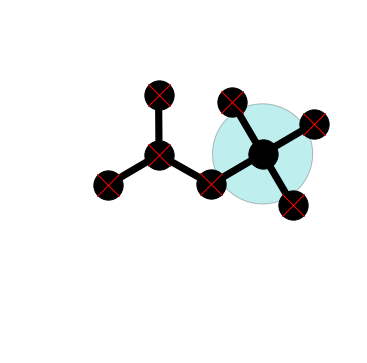

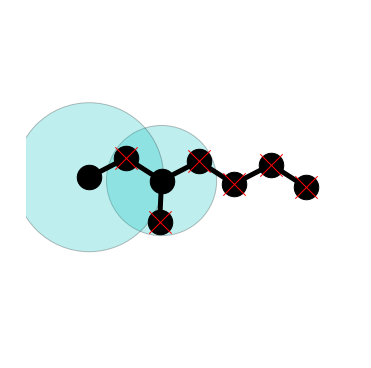

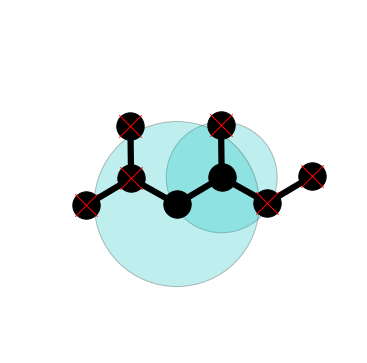

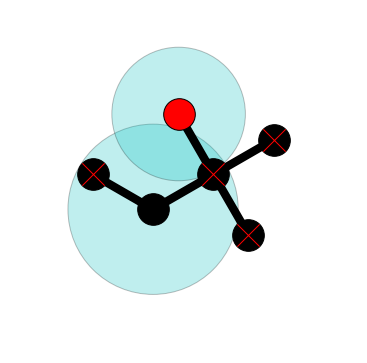

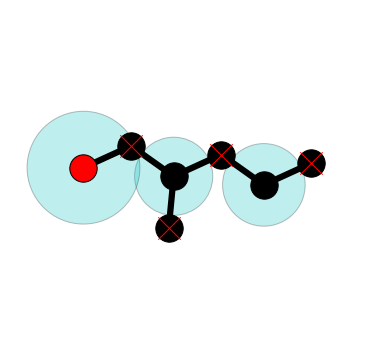

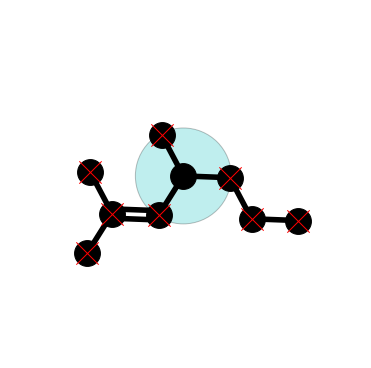

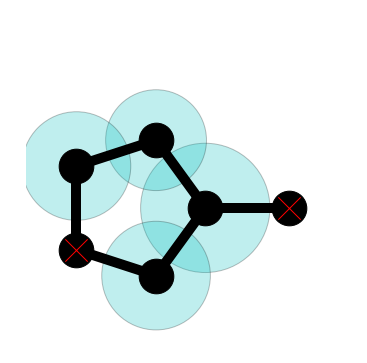

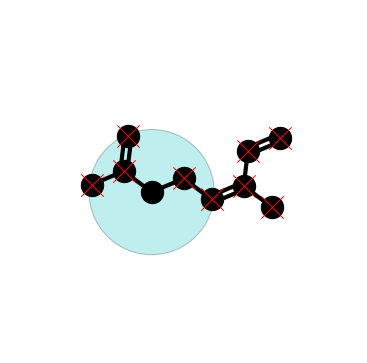

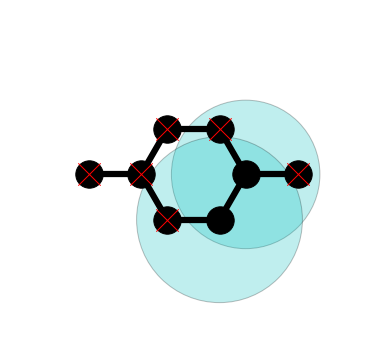

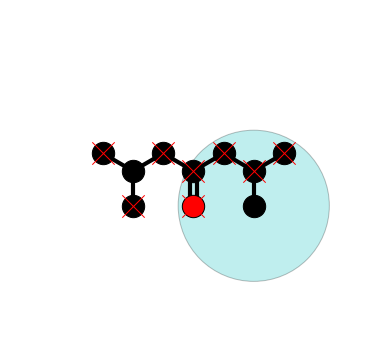

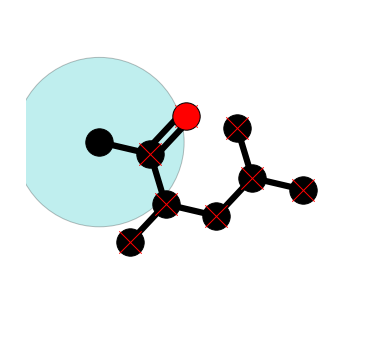

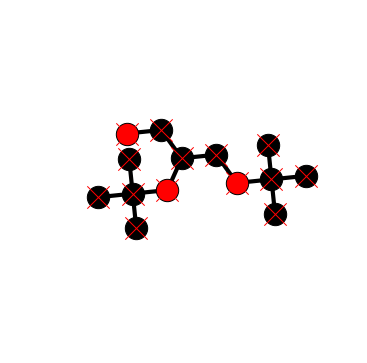

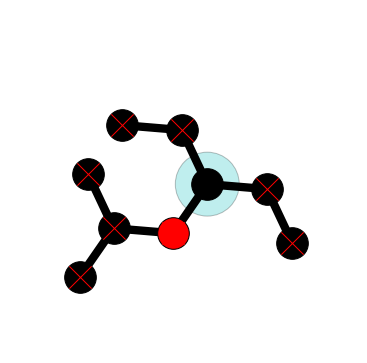

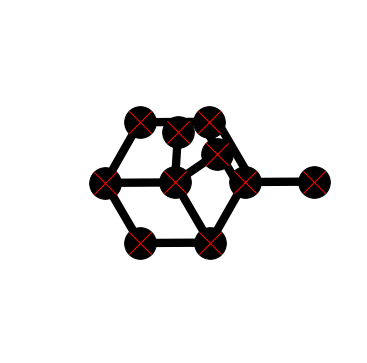

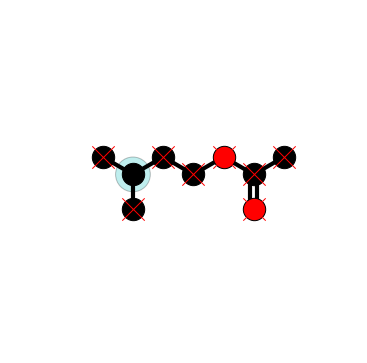

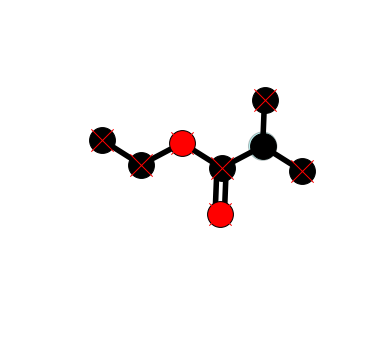

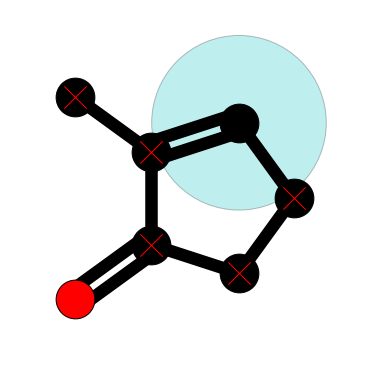

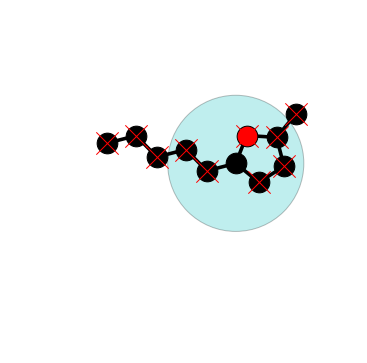

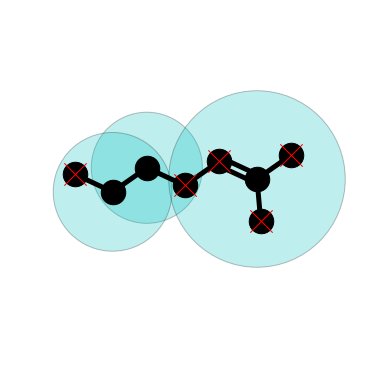

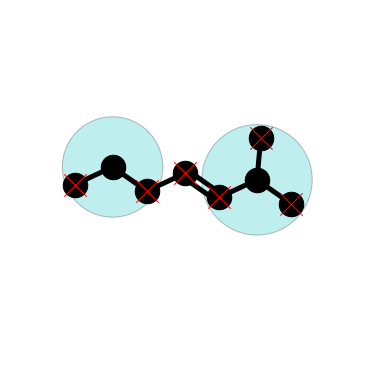

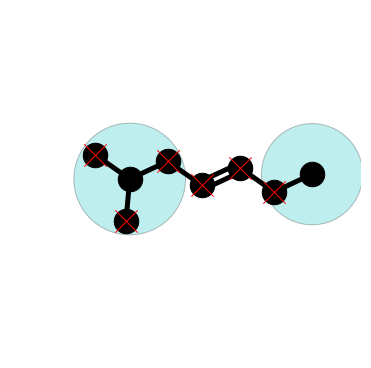

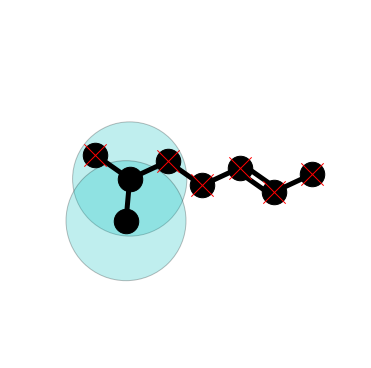

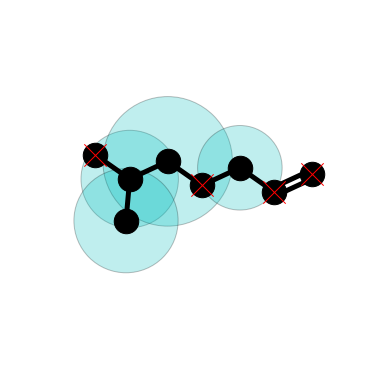

In [37]:
for smiles in list_of_smiles:
    print smiles
    rmg_mol = Molecule(SMILES=smiles)
    rmg_smiles = rmg_mol.toSMILES()
    
    rdmol = rmg_mol.toRDKitMol()
    rdmol.Compute2DCoords()
    tup = rdmol.GetConformers()
    rdconformer = tup[0]
    rates = np.zeros(rdconformer.GetNumAtoms())
    k = 0
    for number in df.loc[rmg_smiles]["Radical Number ID"]:
        print number, k
        #print df.loc[smiles]["Kinetics at 1000K, 100bar"][k]
        if not np.isnan(df.loc[rmg_smiles]["Kinetics at 1000K, 100bar"][k]) and rates[number] == 0:
            rates[number] = df.loc[rmg_smiles]["Kinetics at 1000K, 100bar"][k] *2000
            #print df.loc[rmg_smiles]["Kinetics at 1000K, 100bar"][k]
        elif rates[number] != 0:
            #print "Previous rate"
            #print rates[number]
            #print df.loc[rmg_smiles]["Kinetics at 1000K, 100bar"][k]
            r = rates[number] 
            if r < df.loc[rmg_smiles]["Kinetics at 1000K, 100bar"][k] *2000:
                rates[number] = df.loc[rmg_smiles]["Kinetics at 1000K, 100bar"][k]*2000
        #print rates[number]
        #print
        k +=1
    #for atom in rdmol.Atoms:
    #igure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    fig, ax = plt.subplots(figsize=(6,6), dpi=120)

    x=[]
    y=[]


    for i in range(rdconformer.GetNumAtoms()):
        indx = rdmol.GetAtomWithIdx(i).GetIdx()
        #print rdmol.GetAtoms()[i].GetAtomicNum()
        #print rdconformer.GetAtomPosition(i).x, rdconformer.GetAtomPosition(i).y, rdconformer.GetAtomPosition(i).z
        x.append(rdconformer.GetAtomPosition(indx).x)
        y.append(rdconformer.GetAtomPosition(indx).y)

    ax.scatter(x,y, s=rates, c='c', alpha=0.25, zorder=0)
    
    for i in range(len(rates)):
        rate = rates[i]
        if rate == 0:
            ax.scatter(x[i], y[i], marker="x", s=500, c="r", zorder=10000)

    ax.set_aspect('equal')
    lim = ax.get_xlim()
    lim2 = ax.get_ylim()
    if lim > lim2:
        lim = lim2
    diff = abs(lim[0] - lim[1])
    size = 12000 / (2*diff)
    thick = 50./ ( diff)

    minimum = np.min((ax.get_xlim(),ax.get_ylim()))
    maximum = np.max((ax.get_xlim(),ax.get_ylim()))

        # ToDo: Fix for double, triple bonds

    ax.set_xlim(minimum*1.2,maximum*1.2)
    ax.set_ylim(minimum*1.2,maximum*1.2)


    for bond in rdmol.GetBonds():
        print bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType()
        if str(bond.GetBondType()) == "SINGLE" or str(bond.GetBondType()) == "AROMATIC" :
            new_x = [x[bond.GetBeginAtomIdx()], x[bond.GetEndAtomIdx()]]
            new_y = [y[bond.GetBeginAtomIdx()], y[bond.GetEndAtomIdx()]]
            plt.plot(new_x, new_y, "k", alpha=1,zorder=1, linewidth=thick)
        elif str(bond.GetBondType()) == "DOUBLE":
            rise = y[bond.GetBeginAtomIdx()] - y[bond.GetEndAtomIdx()]
            run = x[bond.GetBeginAtomIdx()] - x[bond.GetEndAtomIdx()]


            del_y = sympy.Symbol('del_y')
            try:
                a = sympy.solvers.solve(0.1**2 - (- (rise/run) * del_y)**2 - del_y**2, del_y)
                del_x = - (rise/run) * a[0]
                v_1 = 0.15 * del_x / (del_x**2 + a[0]**2)**0.5
                v_2 = 0.15 * a[0] / (del_x**2 + a[0]**2)**0.5
            except ZeroDivisionError:
                v_1 = 0.15
                v_2 = 0




            new_x = [x[bond.GetBeginAtomIdx()] + v_1, x[bond.GetEndAtomIdx()] + v_1]
            new_y = [y[bond.GetBeginAtomIdx()] + v_2, y[bond.GetEndAtomIdx()] + v_2]
            newnew_x = [x[bond.GetBeginAtomIdx()] - v_1, x[bond.GetEndAtomIdx()] - v_1]
            newnew_y = [y[bond.GetBeginAtomIdx()] - v_2, y[bond.GetEndAtomIdx()] - v_2]
            plt.plot(new_x, new_y, "k", alpha=1, zorder=1, linewidth=thick)
            plt.plot(newnew_x, newnew_y, "k", alpha=1, zorder=1, linewidth=thick)
        elif str(bond.GetBondType()) == "TRIPLE":

            rise = y[bond.GetBeginAtomIdx()] - y[bond.GetEndAtomIdx()]
            run = x[bond.GetBeginAtomIdx()] - x[bond.GetEndAtomIdx()]


            del_y = sympy.Symbol('del_y')
            a = sympy.solvers.solve(0.1**2 - (- (rise/run) * del_y)**2 - del_y**2, del_y)
            del_x = - (rise/run) * a[0]
            dell_x = - (rise/run) * a[1]
            v_1 = 0.24 * del_x / (del_x**2 + a[0]**2)**0.5
            v_2 = 0.24 * a[0] / (del_x**2 + a[0]**2)**0.5

            new_x = [x[bond.GetBeginAtomIdx()], x[bond.GetEndAtomIdx()]]
            new_y = [y[bond.GetBeginAtomIdx()], y[bond.GetEndAtomIdx()]]
            newnew_x = [x[bond.GetBeginAtomIdx()] + v_1, x[bond.GetEndAtomIdx()] + v_1]
            newnew_y = [y[bond.GetBeginAtomIdx()] + v_2, y[bond.GetEndAtomIdx()] + v_2]
            newnewnew_x = [x[bond.GetBeginAtomIdx()] - v_1, x[bond.GetEndAtomIdx()] - v_1]
            newnewnew_y = [y[bond.GetBeginAtomIdx()] - v_2, y[bond.GetEndAtomIdx()] - v_2]
            plt.plot(new_x, new_y, "k", alpha=1, zorder=1, linewidth=thick)
            plt.plot(newnew_x, newnew_y, "k", alpha=1, zorder=1, linewidth=thick)
            plt.plot(newnewnew_x, newnewnew_y, "k", alpha=1, zorder=1, linewidth=thick)





    plt.axis("off")


    for i in range(rdconformer.GetNumAtoms()):
        indx = rdmol.GetAtomWithIdx(i).GetIdx()
        if rdmol.GetAtoms()[i].GetAtomicNum() == 6:
            plt.scatter(rdconformer.GetAtomPosition(indx).x, rdconformer.GetAtomPosition(indx).y, c="k", s=size, alpha=1, zorder=10)
        elif rdmol.GetAtoms()[i].GetAtomicNum() == 7:
            plt.scatter(rdconformer.GetAtomPosition(indx).x, rdconformer.GetAtomPosition(indx).y, c="b", s=size, alpha=1, zorder=10)
        elif rdmol.GetAtoms()[i].GetAtomicNum() == 8:
            plt.scatter(rdconformer.GetAtomPosition(indx).x, rdconformer.GetAtomPosition(indx).y, c="r", s=size, alpha=1, zorder=10)




0 1 SINGLE
1 2 SINGLE
2 3 SINGLE
3 4 SINGLE
4 5 SINGLE
1 6 SINGLE
6 7 SINGLE
7 8 SINGLE
8 9 SINGLE


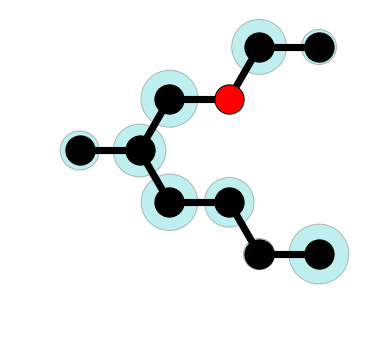

In [36]:

smiles = "CC(COCC)CCCC"
try:
    rdmol = rdkit.Chem.AllChem.MolFromSmiles(smiles)
except:
    rdmol = rdkit.Chem.AllChem.MolFromInchi(smiles)
rdmol.Compute2DCoords()
tup = rdmol.GetConformers()
rdconformer = tup[0]
rates = np.random.rand(rdconformer.GetNumAtoms())*4000 #figure out how to get rates
#for atom in rdmol.Atoms:
#igure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(figsize=(6,6), dpi=120)

x=[]
y=[]


for i in range(rdconformer.GetNumAtoms()):
    indx = rdmol.GetAtomWithIdx(i).GetIdx()
    #print rdmol.GetAtoms()[i].GetAtomicNum()
    #print rdconformer.GetAtomPosition(i).x, rdconformer.GetAtomPosition(i).y, rdconformer.GetAtomPosition(i).z
    x.append(rdconformer.GetAtomPosition(indx).x)
    y.append(rdconformer.GetAtomPosition(indx).y)
    
ax.scatter(x,y, s=rates, c='c', alpha=0.25, zorder=0)
    
ax.set_aspect('equal')
lim = ax.get_xlim()
lim2 = ax.get_ylim()
if lim > lim2:
    lim = lim2
diff = abs(lim[0] - lim[1])
size = 12000 / (2*diff)
thick = 50./ ( diff)

minimum = np.min((ax.get_xlim(),ax.get_ylim()))
maximum = np.max((ax.get_xlim(),ax.get_ylim()))
    
    # ToDo: Fix for double, triple bonds

ax.set_xlim(minimum*1.2,maximum*1.2)
ax.set_ylim(minimum*1.2,maximum*1.2)


for bond in rdmol.GetBonds():
    print bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType()
    if str(bond.GetBondType()) == "SINGLE":
        new_x = [x[bond.GetBeginAtomIdx()], x[bond.GetEndAtomIdx()]]
        new_y = [y[bond.GetBeginAtomIdx()], y[bond.GetEndAtomIdx()]]
        plt.plot(new_x, new_y, "k", alpha=1,zorder=1, linewidth=thick)
    elif str(bond.GetBondType()) == "DOUBLE":
        rise = y[bond.GetBeginAtomIdx()] - y[bond.GetEndAtomIdx()]
        run = x[bond.GetBeginAtomIdx()] - x[bond.GetEndAtomIdx()]
        

        del_y = sympy.Symbol('del_y')
        try:
            a = sympy.solvers.solve(0.1**2 - (- (rise/run) * del_y)**2 - del_y**2, del_y)
            del_x = - (rise/run) * a[0]
            v_1 = 0.15 * del_x / (del_x**2 + a[0]**2)**0.5
            v_2 = 0.15 * a[0] / (del_x**2 + a[0]**2)**0.5
        except ZeroDivisionError:
            v_1 = 0.15
            v_2 = 0
            
        
    
        
        new_x = [x[bond.GetBeginAtomIdx()] + v_1, x[bond.GetEndAtomIdx()] + v_1]
        new_y = [y[bond.GetBeginAtomIdx()] + v_2, y[bond.GetEndAtomIdx()] + v_2]
        newnew_x = [x[bond.GetBeginAtomIdx()] - v_1, x[bond.GetEndAtomIdx()] - v_1]
        newnew_y = [y[bond.GetBeginAtomIdx()] - v_2, y[bond.GetEndAtomIdx()] - v_2]
        plt.plot(new_x, new_y, "k", alpha=1, zorder=1, linewidth=thick)
        plt.plot(newnew_x, newnew_y, "k", alpha=1, zorder=1, linewidth=thick)
    elif str(bond.GetBondType()) == "TRIPLE":
        
        rise = y[bond.GetBeginAtomIdx()] - y[bond.GetEndAtomIdx()]
        run = x[bond.GetBeginAtomIdx()] - x[bond.GetEndAtomIdx()]
        

        del_y = sympy.Symbol('del_y')
        a = sympy.solvers.solve(0.1**2 - (- (rise/run) * del_y)**2 - del_y**2, del_y)
        del_x = - (rise/run) * a[0]
        dell_x = - (rise/run) * a[1]
        v_1 = 0.24 * del_x / (del_x**2 + a[0]**2)**0.5
        v_2 = 0.24 * a[0] / (del_x**2 + a[0]**2)**0.5
        
        new_x = [x[bond.GetBeginAtomIdx()], x[bond.GetEndAtomIdx()]]
        new_y = [y[bond.GetBeginAtomIdx()], y[bond.GetEndAtomIdx()]]
        newnew_x = [x[bond.GetBeginAtomIdx()] + v_1, x[bond.GetEndAtomIdx()] + v_1]
        newnew_y = [y[bond.GetBeginAtomIdx()] + v_2, y[bond.GetEndAtomIdx()] + v_2]
        newnewnew_x = [x[bond.GetBeginAtomIdx()] - v_1, x[bond.GetEndAtomIdx()] - v_1]
        newnewnew_y = [y[bond.GetBeginAtomIdx()] - v_2, y[bond.GetEndAtomIdx()] - v_2]
        plt.plot(new_x, new_y, "k", alpha=1, zorder=1, linewidth=thick)
        plt.plot(newnew_x, newnew_y, "k", alpha=1, zorder=1, linewidth=thick)
        plt.plot(newnewnew_x, newnewnew_y, "k", alpha=1, zorder=1, linewidth=thick)
        
    
    


plt.axis("off")


for i in range(rdconformer.GetNumAtoms()):
    indx = rdmol.GetAtomWithIdx(i).GetIdx()
    if rdmol.GetAtoms()[i].GetAtomicNum() == 6:
        plt.scatter(rdconformer.GetAtomPosition(indx).x, rdconformer.GetAtomPosition(indx).y, c="k", s=size, alpha=1, zorder=10)
    elif rdmol.GetAtoms()[i].GetAtomicNum() == 7:
        plt.scatter(rdconformer.GetAtomPosition(indx).x, rdconformer.GetAtomPosition(indx).y, c="b", s=size, alpha=1, zorder=10)
    elif rdmol.GetAtoms()[i].GetAtomicNum() == 8:
        plt.scatter(rdconformer.GetAtomPosition(indx).x, rdconformer.GetAtomPosition(indx).y, c="r", s=size, alpha=1, zorder=10)




In [22]:
rdmol.RemoveAllConformers()

In [23]:
rdmol.AddConformer(rdconformer)

0

In [35]:
rdmol
for i in range(len(rdmol.GetAtoms())):
    indx = rdmol.GetAtomWithIdx(i).GetIdx()
    print rdconformer.GetAtomPosition(indx).x

-2.28098987632
-0.920653603802
0.306884534601
1.66722080712
-3.50852801473
-2.41378801045
2.89475894553
4.25509521805


In [33]:
atommm.GetIdx()

7